In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

In [3]:
# Read in the preprocessed_transaction_data from the the CSV file

transaction_data = pd.read_csv('datasets/preprocessed_transaction_data.csv')
transaction_data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_TRANSFER,origBalanceDiscrepancy,destBalanceDiscrepancy
0,11,427818.23,198219.0,0.00,0.00,427818.23,0,False,229599.23,0.000000e+00
1,20,80828.54,0.0,0.00,5149991.49,5230820.04,0,False,80828.54,-1.000000e-02
2,20,106069.89,301258.0,195188.11,263816.83,369886.72,0,True,0.00,5.820766e-11
3,18,402832.90,11665.0,0.00,28550.98,431383.87,0,False,391167.90,1.000000e-02
4,22,34643.49,0.0,0.00,346081.41,380724.90,0,False,34643.49,-5.820766e-11


In [4]:
# Set up the features and target for our classification model
# x variables include all of the columns that have the dataset, except for isFraud
# y variables targets the 'isFraud' column, which flags whether the transaction is fraudulent or not

x = transaction_data.drop(['isFraud'], axis = 1)
y = transaction_data['isFraud']

In [5]:
# Split our datasets into training data and test data
# I'll use 70% of the records that is for training the model and 30% to evaluate model

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)
x_train.shape, x_test.shape

#61k records for training & 24k records for evaluation or testing 

((61598, 9), (26400, 9))

In [6]:
# Building a number of different clasification models

from sklearn.linear_model import LogisticRegression

# LogisticRegression fits an s-curve on your data to classify points
logistic_clf = LogisticRegression()
# Call fit on the training data-will train the LogisticRegression model
logistic_clf.fit(x_train, y_train)

LogisticRegression()

In [7]:
# Once a model is trained, it can be used for prediction
# Invoked the predict method on my regression model- passed in the test data

y_pred_logistic = logistic_clf.predict(x_test)
#y_pred_logistic will display sample of the prediction from the model
y_pred_logistic[:5]

array([0, 0, 0, 0, 0])

In [8]:
# Used accuracy, precision, and recall to evaluate this model
# compute the accuracy_score, precision_score, and recall_score 


from sklearn.metrics import accuracy_score, precision_score, recall_score

print('Logistic Regression\n')

print('Accuracy: ', accuracy_score(y_test, y_pred_logistic))
print('Precision: ', precision_score(y_test, y_pred_logistic))
print('Recall : ', recall_score(y_test, y_pred_logistic))

Logistic Regression

Accuracy:  0.9713636363636363
Precision:  0.9306987399770905
Recall :  0.7190265486725663


In [9]:
# built another classification model- Gaussian Naive Bayes this model uses conditional probabilities to determine whether a transaction is fraudulent or not 

from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()

gnb_clf.fit(x_train, y_train)

GaussianNB()

In [10]:
# Now that the model is trained. I can get a sample of the predictions from the model on the test data

y_pred_gnb = gnb_clf.predict(x_test)

y_pred_gnb[:5]

array([0, 0, 0, 0, 0])

In [11]:
# Now accuracy can be computed for accuracy, precision, and recall scores for predictions using Gaussian Naive Bayes

print('Naive Bayes\n')

print('Accuracy: ', accuracy_score(y_test, y_pred_gnb))
print ('Precision: ', precision_score(y_test, y_pred_gnb))
print('Recall: ', recall_score(y_test, y_pred_gnb))

# This time the model hasent done as well
#The accuracy is still high, but the precision of this model is about 71% and recall is very low, and only 45% of the fraudulent transactions in the dataset were identified in this model

Naive Bayes

Accuracy:  0.9371969696969698
Precision:  0.7099023709902371
Recall:  0.4504424778761062


In [12]:
# This classification model will train the support vector classifier.
# This classifier draws a hyperplane in an n-dimensional hypercuber to classify data points


from sklearn.svm import SVC

svc_clf = SVC()

svc_clf.fit(x_train, y_train)

SVC()

In [13]:
# Now that model is trained, I can use it for prediction 

y_pred_svc = svc_clf.predict(x_test)

y_pred_svc

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
# Computed the accuracy, prescision, and recall scores for the vector classifier

print('Support Vector Classifier\n')

print('Accuracy: ', accuracy_score(y_test, y_pred_svc))
print('Precision: ', precision_score(y_test, y_pred_svc))
print('Recall: ', recall_score(y_test, y_pred_svc))

# Percision is extreamly high at 98.2%, however the recall is not as great compared to the logistic regression model its at 58% (but its better than the GNB model)

Support Vector Classifier

Accuracy:  0.963560606060606
Precision:  0.9828869047619048
Recall:  0.5845132743362832


In [16]:
# This classification model that I will train is the RandomForestClassifier
# The random forest model is an ensemble model, it trains multiple decision tree models under the hood, the final prediction is an aggregation of the predictions made by those multiple decision trees.

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()

rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [17]:
# Now I will use this trained model, for prediction on the test data. 

y_pred_rf = rf_clf.predict(x_test)
y_pred_rf[:5]

array([0, 0, 0, 0, 0])

In [18]:
# Computed the accuracy, precision, and recall scores for random forests
# Ensemble models tend to do better than standalone ML models (proven by scores)
# The accuracy, precision, and recall of this model are all above or at 99%
# This is a very good model for fraud detection for this dataset

print('Random Forest\n')

print('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print('Precision: ', precision_score(y_test, y_pred_rf))
print('Recall: ', recall_score(y_test, y_pred_rf))

Random Forest

Accuracy:  0.9995833333333334
Precision:  0.9995557529986673
Recall:  0.995575221238938


In [19]:
# I computed a few other metrics to evaluate the diffrent classification models that we built
# Specifically, we'll compute the ROC curve that is the receiver operator characteristic curve and then calculate the AUC (the area under the curve)

# The receiver operator characteristic ROC, curve plot the true pos rate of a classification models vs. the false pos rate
# Want to maximize the true pos and min the false pos
# Invoke the roc_curve function, this will give me the FBR (false pos rate)
# It will also provide the TPR (true pos rate) for the logistic model at different probability thresholds

# Using the false pos and true pos rate can compute the area under the ROC curve 

from sklearn.metrics import auc, roc_curve

fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_logistic)

# This AUC is a measure of how well the model performs AUC is a measure of how capable our classification model is of distinguishing or differentiating between classes
AUC_logistic = auc(fpr_logistic, tpr_logistic)

print('AUC for Logistic Regression :', AUC_logistic)


AUC for Logistic Regression : 0.8570070605831763


In [20]:
#

fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_pred_gnb)

AUC_gnb = auc(fpr_gnb, tpr_gnb)

print('AUC for Naive Bayes :', AUC_gnb)

AUC for Naive Bayes : 0.7166048346298509


In [21]:
#

fpr_svc, tpr_svc, _ = roc_curve(y_test, y_pred_svc)

AUC_svc = auc(fpr_svc, tpr_svc)

print('AUC for Support Vector Classifier :', AUC_svc)

AUC for Support Vector Classifier : 0.7917802494299477


In [22]:
#

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

AUC_rf = auc(fpr_rf, tpr_rf)

print('AUC for Random Forest :', AUC_rf)

AUC for Random Forest : 0.9977668981091127


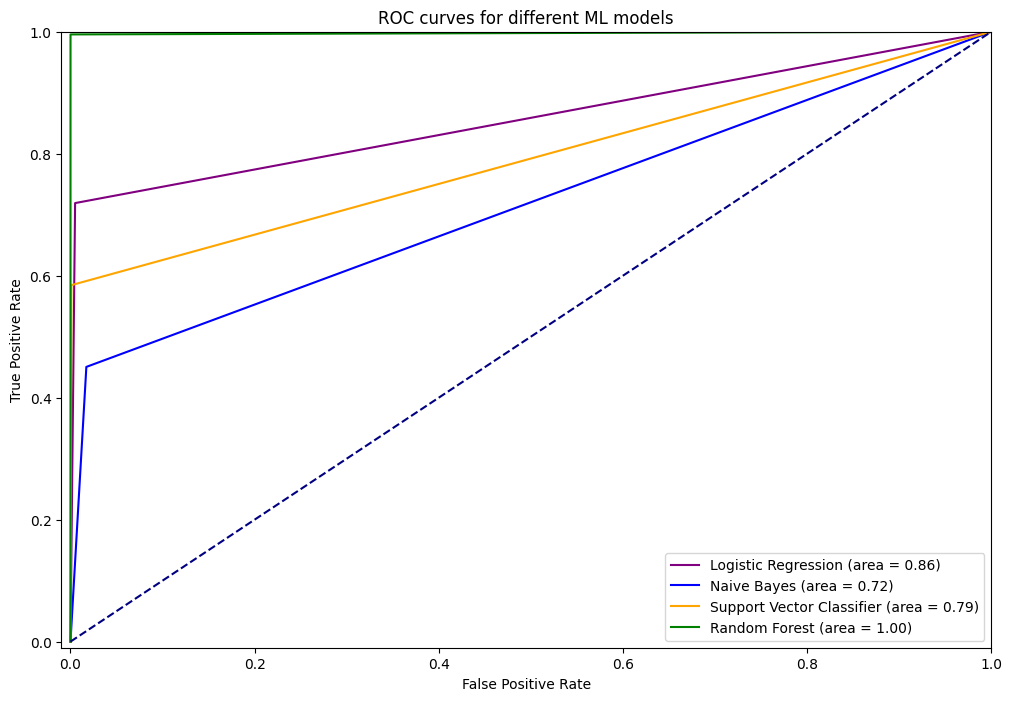

In [23]:
#

plt.figure(figsize=(12, 8))

plt.plot(fpr_logistic, tpr_logistic, color = 'purple', 
         label = 'Logistic Regression (area = %0.2f)' % AUC_logistic)

plt.plot(fpr_gnb, tpr_gnb, color = 'blue', 
         label = 'Naive Bayes (area = %0.2f)' % AUC_gnb)

plt.plot(fpr_svc, tpr_svc, color = 'orange', 
         label = 'Support Vector Classifier (area = %0.2f)' % AUC_svc)

plt.plot(fpr_rf, tpr_rf, color = 'green', 
         label = 'Random Forest (area = %0.2f)' % AUC_rf)

plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')

plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curves for different ML models')
plt.legend(loc = 'lower right')

In [ ]:
#

